In [45]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [46]:
# Read data and create copy to clean.
BSS_data = pd.read_csv('example_data/batting_season_summary.csv')
free_agents = pd.read_csv('example_data/submission_example.csv')
BSS_data_clean = BSS_data.copy()
BSS_data_clean.head()

,Name,age,team,pos,PA,AB,H,2B,3B,HR,BB,SO,P/PA,BA,OBP,SLG,OPS,Year
0,Abel De Los Santos,25,Cubs,1B,721,676,151,36,28,4,45,170,3.353675,0.223373,0.271845,0.377219,0.649064,2014
1,Adalberto Mendez,28,Phillies,LF,653,623,110,19,18,3,30,104,2.980092,0.176565,0.214395,0.279294,0.493689,2014
2,Adam Greenberg,28,Pirates,RF,579,514,144,29,21,12,65,112,3.414508,0.280156,0.360967,0.488327,0.849294,2014
3,Adam Peterson,21,Braves,1B,742,668,192,45,40,10,74,161,3.357143,0.287425,0.358491,0.519461,0.877952,2014
4,Adam Shabala,34,Mariners,SS,637,600,109,26,12,10,37,143,3.175824,0.181667,0.229199,0.315000,0.544199,2014


In [48]:
# BSS_data_clean.drop(columns=['Name', 'team', 'pos'], inplace=True) Drop strings from df
print(BSS_data_clean.corr())

# Correlation matrix shows at bats, doubles, home runs, bases on balls, batting 
# average, on-base percentage, slugging percentage, and on-base plus slugging
# are postively correlated with hits.

           age        PA        AB         H        2B        3B        HR  \
age   1.000000 -0.060151  0.009760 -0.124677 -0.100933 -0.004750 -0.102539   
PA   -0.060151  1.000000  0.875075  0.379020  0.305250  0.313438  0.115545   
AB    0.009760  0.875075  1.000000  0.243897  0.204502  0.217984  0.076466   
H    -0.124677  0.379020  0.243897  1.000000  0.804286  0.215481  0.816505   
2B   -0.100933  0.305250  0.204502  0.804286  1.000000  0.057835  0.628808   
3B   -0.004750  0.313438  0.217984  0.215481  0.057835  1.000000 -0.038602   
HR   -0.102539  0.115545  0.076466  0.816505  0.628808 -0.038602  1.000000   
BB   -0.139995  0.254872 -0.244972  0.271966  0.202899  0.192367  0.078686   
SO   -0.005340  0.179686  0.230239 -0.421786 -0.321311  0.127251 -0.536524   
P/PA -0.070839  0.062112 -0.193177 -0.270407 -0.212440  0.178491 -0.444683   
BA   -0.132487  0.070934 -0.112982  0.933567  0.747713  0.143774  0.804969   
OBP  -0.159435  0.092541 -0.253784  0.807762  0.640291  0.169904

In [49]:
BSS_data_clean.head()

,age,PA,AB,H,2B,3B,HR,BB,SO,P/PA,BA,OBP,SLG,OPS,Year
0,25,721,676,151,36,28,4,45,170,3.353675,0.223373,0.271845,0.377219,0.649064,2014
1,28,653,623,110,19,18,3,30,104,2.980092,0.176565,0.214395,0.279294,0.493689,2014
2,28,579,514,144,29,21,12,65,112,3.414508,0.280156,0.360967,0.488327,0.849294,2014
3,21,742,668,192,45,40,10,74,161,3.357143,0.287425,0.358491,0.519461,0.877952,2014
4,34,637,600,109,26,12,10,37,143,3.175824,0.181667,0.229199,0.315000,0.544199,2014


Number of groups: 15


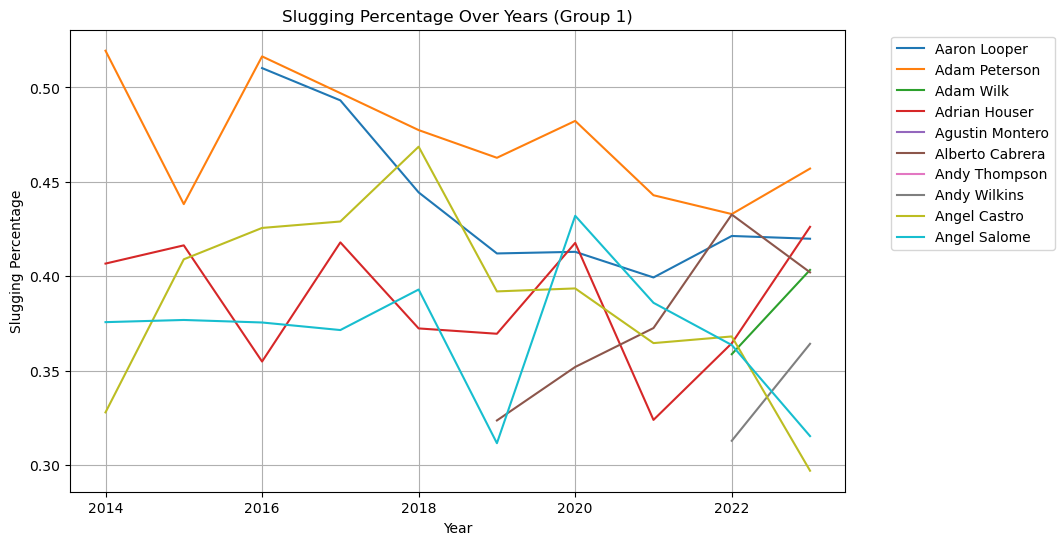

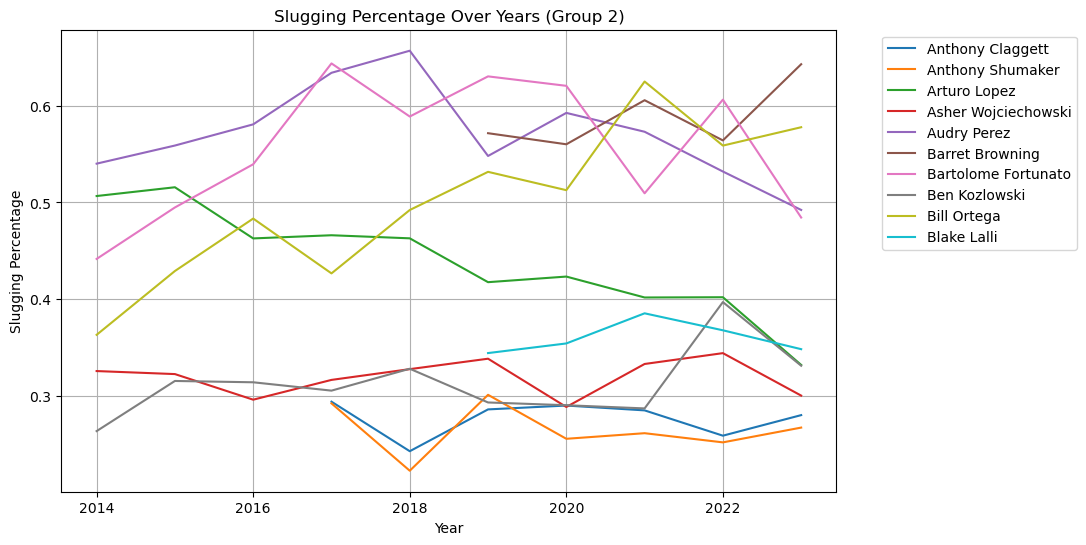

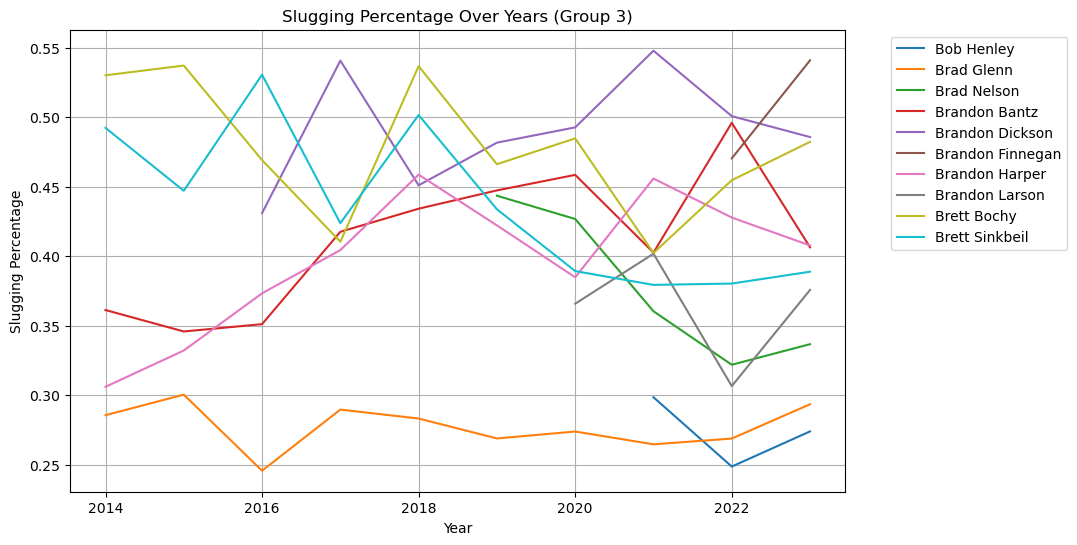

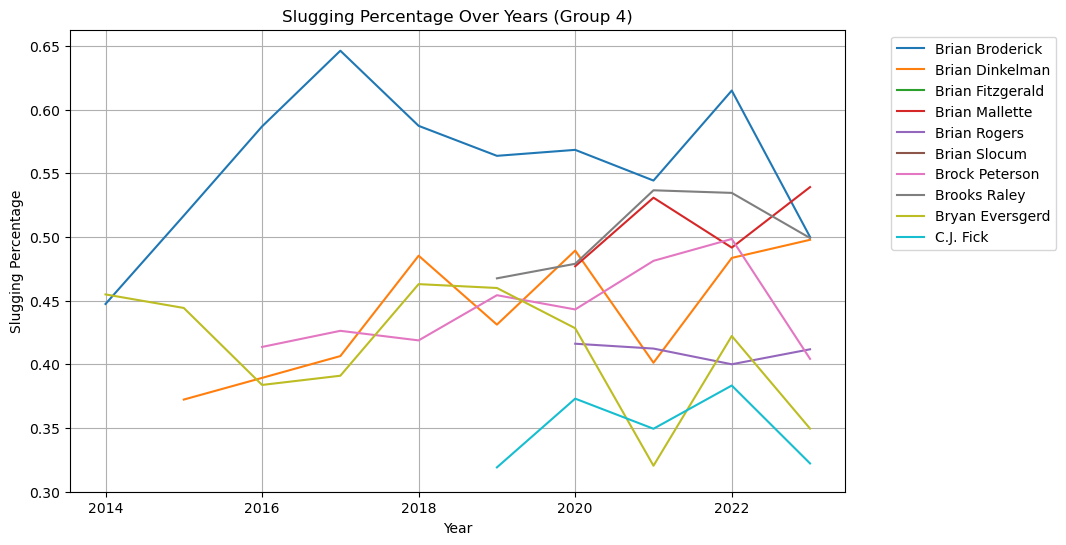

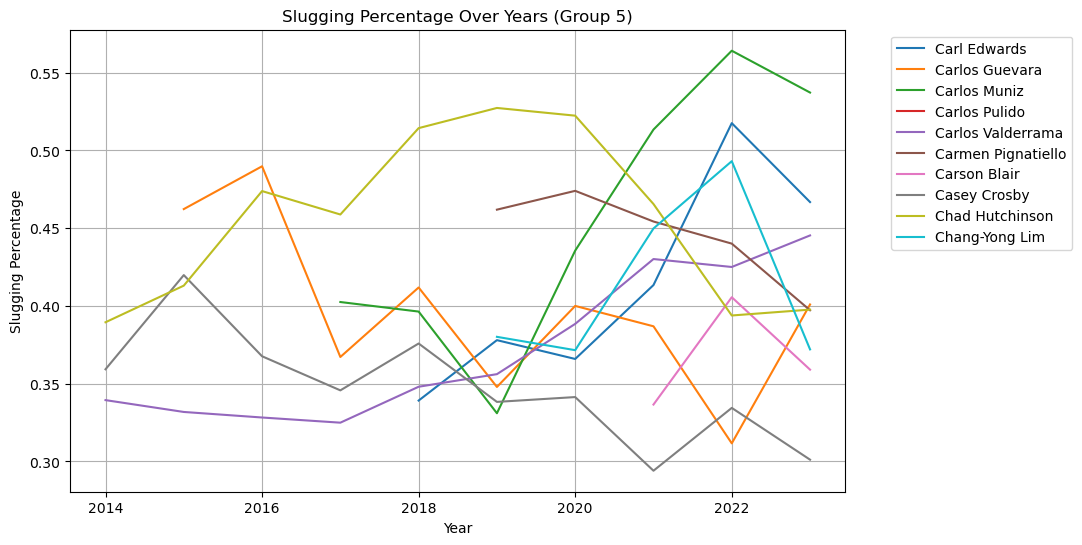

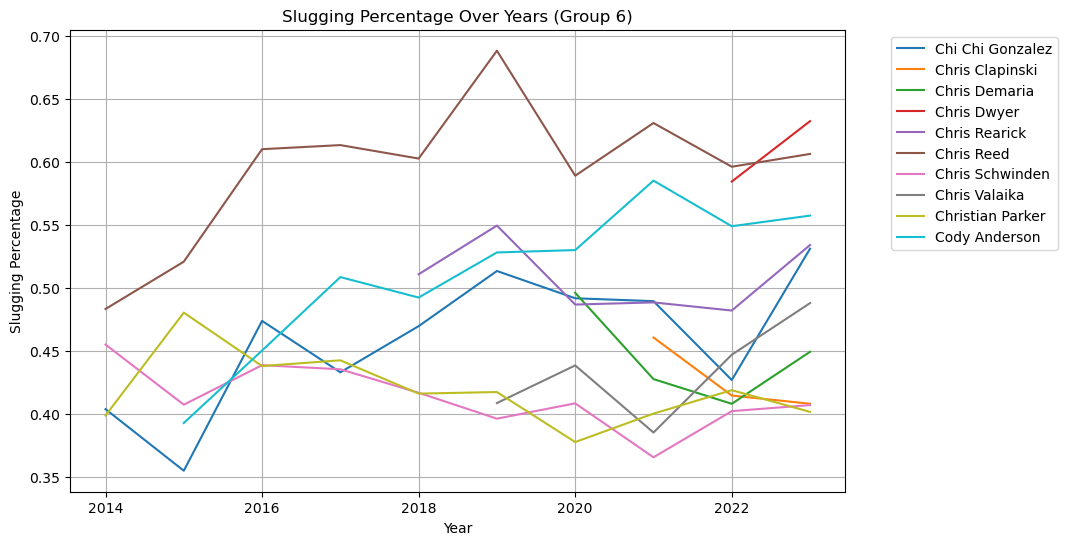

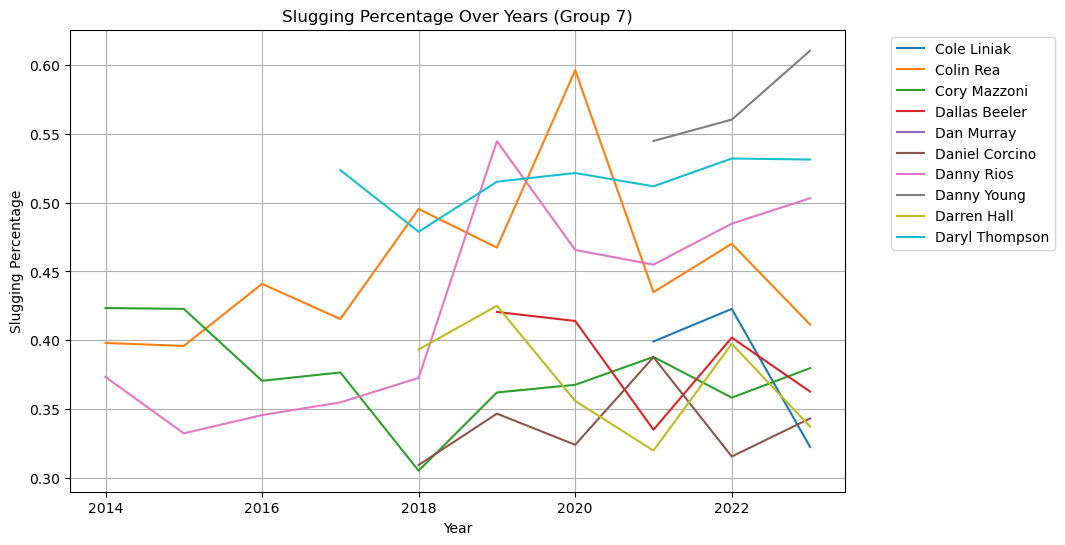

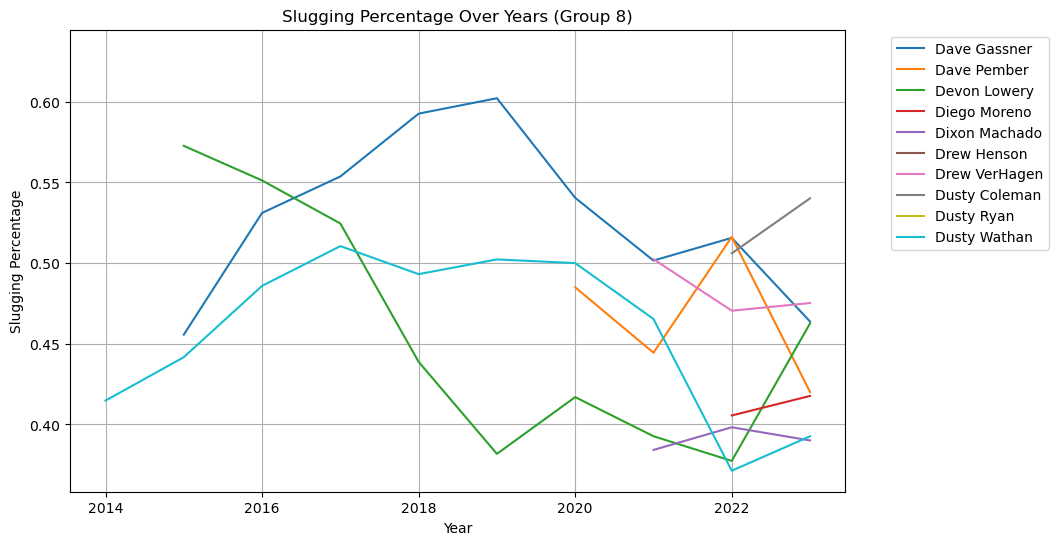

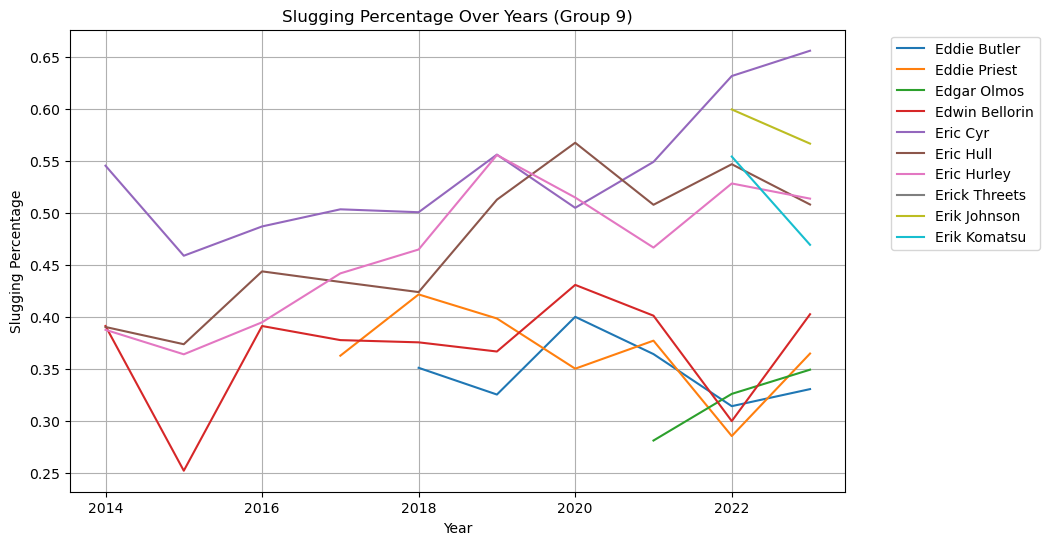

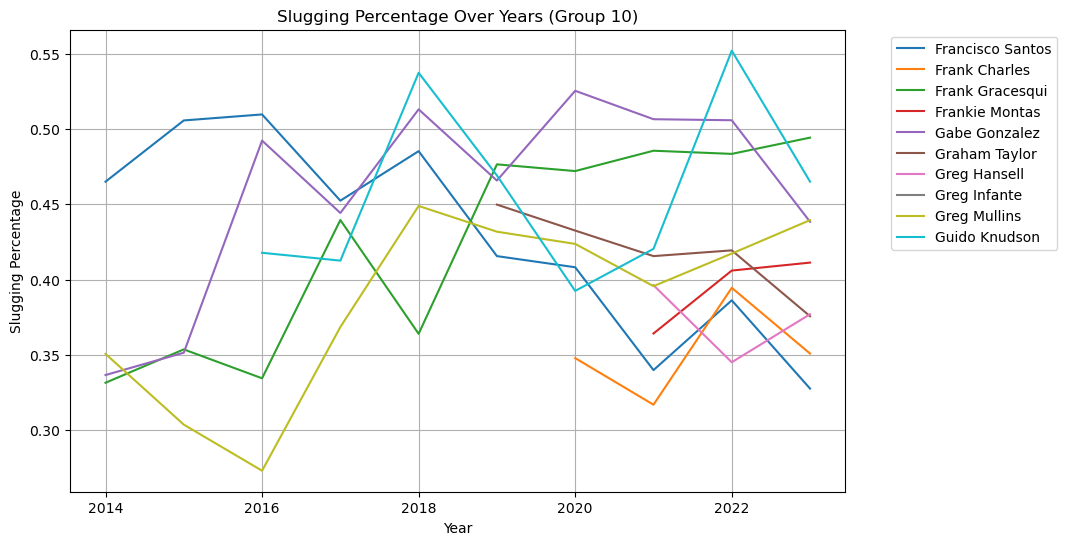

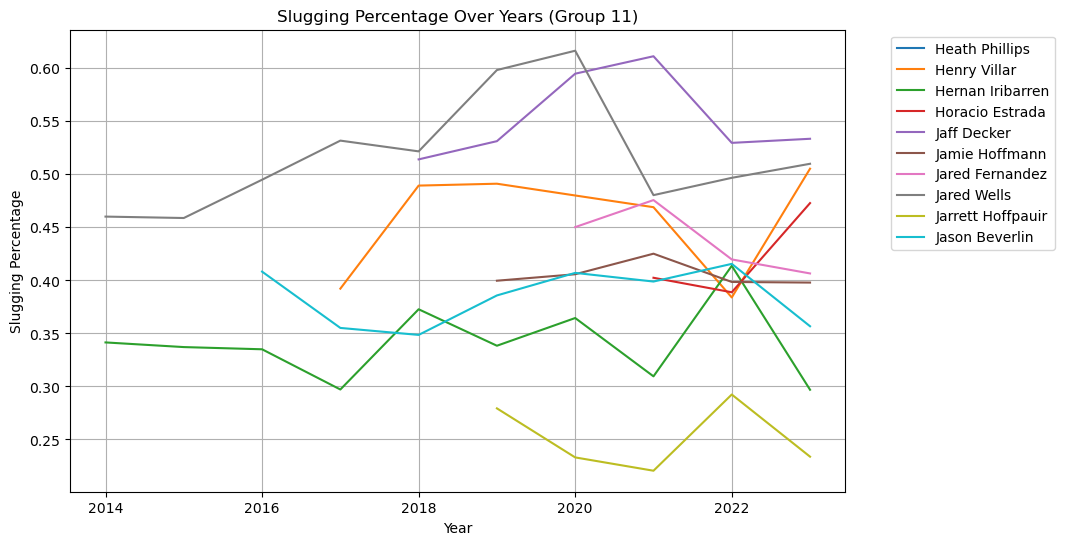

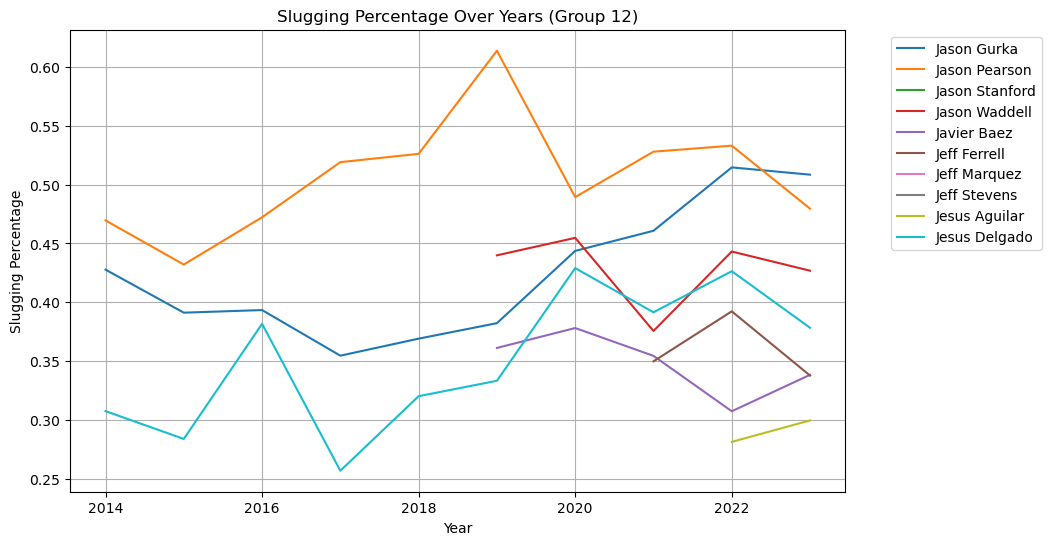

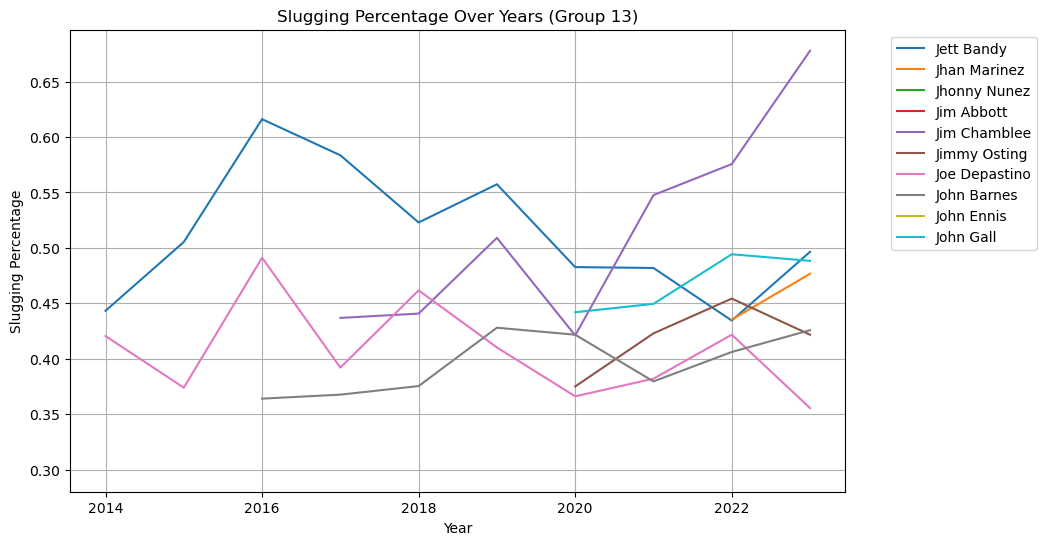

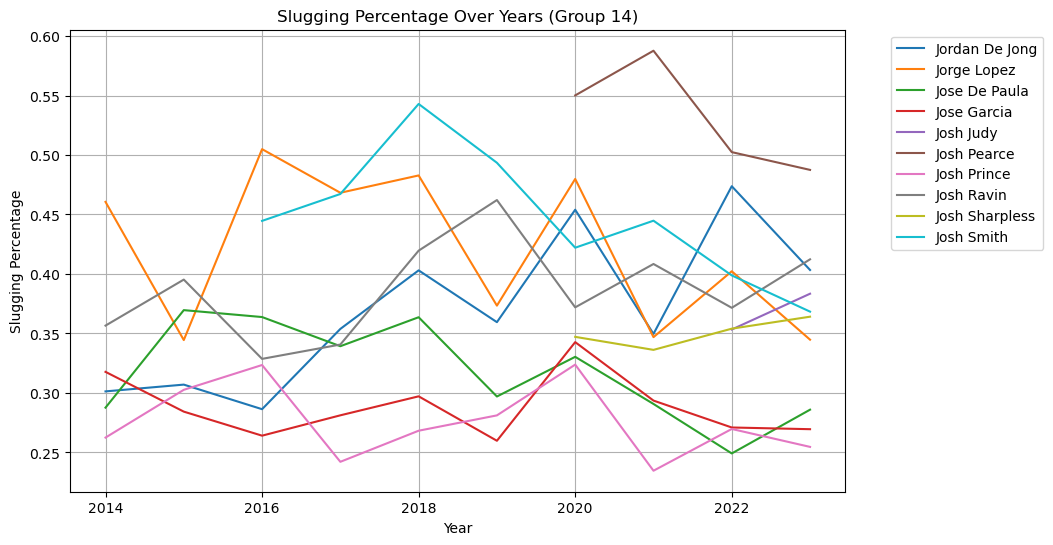

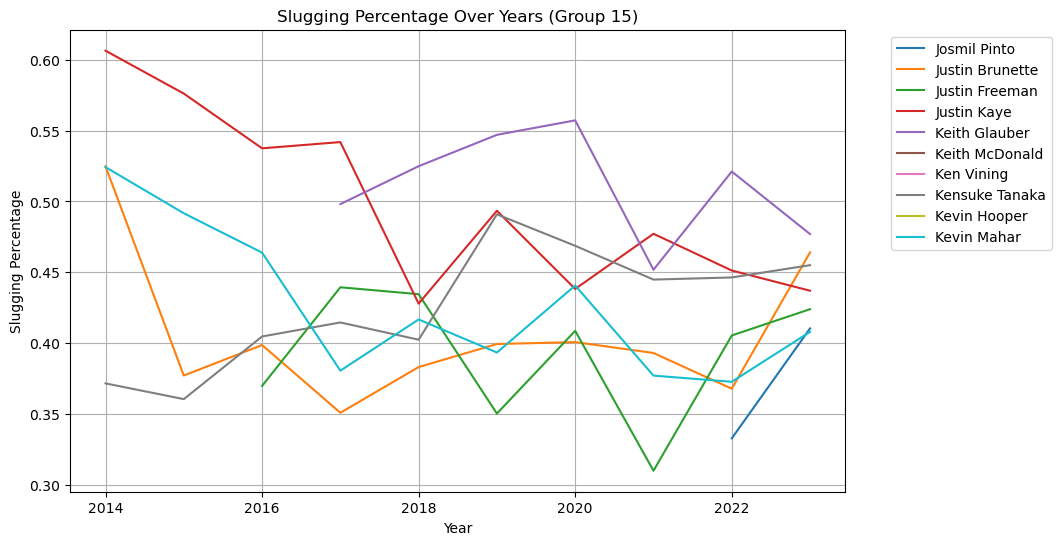

In [50]:
BSS_data_free_agents = BSS_data[BSS_data['Name'].isin(free_agents['Name'])]
grouped_players = BSS_data_free_agents.groupby('Name')

# Convert the grouped_players object to a list of DataFrames
player_groups = [group for _, group in grouped_players]

groups = [player_groups[i:i+10] for i in range(0, len(player_groups), 10)]

# Print the number of groups
print("Number of groups:", len(groups))

# Plotting
for i, group in enumerate(groups):
    plt.figure(figsize=(10, 6))  # Adjust figure size if needed
    for player_data in group:
        plt.plot(player_data['Year'], player_data['SLG'], label=player_data['Name'].iloc[0])  # Use iloc to get the player name
    plt.xlabel('Year')
    plt.ylabel('Slugging Percentage')
    plt.title(f'Slugging Percentage Over Years (Group {i+1})')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

In [54]:
filtered_data = BSS_data[BSS_data['Name'].isin(["Jim Chamblee", "Eric Cyr", "Chris Reed"])]
jim_chamblee_data = filtered_data[filtered_data['Name'] == "Jim Chamblee"].copy()
eric_cyr_data = filtered_data[filtered_data['Name'] == "Eric Cyr"].copy()
chris_reed_data = filtered_data[filtered_data['Name'] == "Chris Reed"].copy()

# Drop specified columns for each player
columns_to_drop = ['Name', 'Year', 'age', 'pos', 'team']
jim_chamblee_data.drop(columns=columns_to_drop, inplace=True)
eric_cyr_data.drop(columns=columns_to_drop, inplace=True)
chris_reed_data.drop(columns=columns_to_drop, inplace=True)

# Calculate the mean for each player
jim_chamblee_mean = jim_chamblee_data.mean()
eric_cyr_mean = eric_cyr_data.mean()
chris_reed_mean = chris_reed_data.mean()

# Print the means for each player
print("Mean statistics for Jim Chamblee:")
print(jim_chamblee_mean)
print("\nMean statistics for Eric Cyr:")
print(eric_cyr_mean)
print("\nMean statistics for Chris Reed:")
print(chris_reed_mean)

Mean statistics for Jim Chamblee:
PA      699.285714
AB      607.428571
H       182.857143
2B       39.571429
3B       25.714286
HR       12.571429
BB       91.857143
SO      115.571429
P/PA      3.437406
BA        0.302046
OBP       0.392919
SLG       0.515494
OPS       0.908413
dtype: float64

Mean statistics for Eric Cyr:
PA      758.300000
AB      708.600000
H       217.000000
2B       49.700000
3B       21.800000
HR       23.700000
BB       49.700000
SO      112.500000
P/PA      3.023982
BA        0.306906
OBP       0.351810
SLG       0.539363
OPS       0.891174
dtype: float64

Mean statistics for Chris Reed:
PA      636.500000
AB      585.900000
H       196.200000
2B       41.500000
3B       19.100000
HR       23.900000
BB       50.600000
SO      103.100000
P/PA      3.151678
BA        0.335091
OBP       0.387653
SLG       0.593871
OPS       0.981524
dtype: float64
